In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

**Data Preprocessing**


Training Image Preprocessing

In [ ]:
training_set= tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Pilot_Data/train',labels='inferred',label_mode='categorical',class_names=None,color_mode='rgb',batch_size=32,image_size=(224,224),shuffle=True,seed=None,validation_split=None,subset=None,interpolation='bilinear',follow_links=False,crop_to_aspect_ratio=False)

Found 3116 files belonging to 36 classes.


Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Pilot_Data/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 351 files belonging to 36 classes.


**Building Model**

In [ ]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(224,224,3)))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

In [ ]:
#cnn.add(tf.keras.layers.Dropout(0.5)) #Avoid Overfitting

In [ ]:
#cnn.add(tf.keras.layers.Flatten()) #Flatten the matrix

In [ ]:
#cnn.add(tf.keras.layers.Dense(units=128,activation='relu')) #Create Neurons

In [ ]:
# cnn.add(tf.keras.layers.Dense(units=36,activation='softmax')) #Output Layer of neural network

**Compiling and Training Phase**

In [ ]:
cnn.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                   

In [ ]:
training_history= cnn.fit(x=training_set, validation_data=validation_set, epochs=12)

Epoch 1/12
98/98 [==============================] - 1257s 12s/step - loss: 27.8831 - accuracy: 0.0315 - val_loss: 3.5605 - val_accuracy: 0.0484
Epoch 2/12
98/98 [==============================] - 1014s 10s/step - loss: 3.5591 - accuracy: 0.0446 - val_loss: 3.4881 - val_accuracy: 0.0969
Epoch 3/12
98/98 [==============================] - 1029s 10s/step - loss: 3.4781 - accuracy: 0.0722 - val_loss: 3.2768 - val_accuracy: 0.1909
Epoch 4/12
98/98 [==============================] - 1028s 10s/step - loss: 3.2698 - accuracy: 0.1367 - val_loss: 2.8756 - val_accuracy: 0.3048
Epoch 5/12
98/98 [==============================] - 1041s 11s/step - loss: 2.9705 - accuracy: 0.2163 - val_loss: 2.7015 - val_accuracy: 0.3989
Epoch 6/12
98/98 [==============================] - 1019s 10s/step - loss: 2.6260 - accuracy: 0.3376 - val_loss: 2.2182 - val_accuracy: 0.5128
Epoch 7/12
98/98 [==============================] - 1041s 11s/step - loss: 2.2746 - accuracy: 0.4535 - val_loss: 1.9018 - val_accuracy: 0.535

**Saving Model**

In [ ]:
cnn.save('Pilot_model11.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history

{'loss': [27.883132934570312,
  3.559122085571289,
  3.4780843257904053,
  3.2697913646698,
  2.970482110977173,
  2.6260228157043457,
  2.274620294570923,
  1.9349291324615479,
  1.619288444519043,
  1.4399890899658203,
  1.1770297288894653,
  1.0886750221252441],
 'accuracy': [0.031450577080249786,
  0.044608473777770996,
  0.07220795750617981,
  0.13671372830867767,
  0.21630294620990753,
  0.3376123309135437,
  0.4534659683704376,
  0.5173299312591553,
  0.6055840849876404,
  0.6675224900245667,
  0.7220795750617981,
  0.7464698553085327],
 'val_loss': [3.5604770183563232,
  3.4880759716033936,
  3.2768137454986572,
  2.875624179840088,
  2.701463222503662,
  2.21818208694458,
  1.9017891883850098,
  1.852033019065857,
  1.986799716949463,
  1.7956894636154175,
  1.8036472797393799,
  1.490938425064087],
 'val_accuracy': [0.04843304678797722,
  0.09686609357595444,
  0.19088318943977356,
  0.30484330654144287,
  0.3988603949546814,
  0.5128205418586731,
  0.5356125235557556,
  0.62

In [ ]:
print(training_history.history,'f')

{'loss': [27.883132934570312, 3.559122085571289, 3.4780843257904053, 3.2697913646698, 2.970482110977173, 2.6260228157043457, 2.274620294570923, 1.9349291324615479, 1.619288444519043, 1.4399890899658203, 1.1770297288894653, 1.0886750221252441], 'accuracy': [0.031450577080249786, 0.044608473777770996, 0.07220795750617981, 0.13671372830867767, 0.21630294620990753, 0.3376123309135437, 0.4534659683704376, 0.5173299312591553, 0.6055840849876404, 0.6675224900245667, 0.7220795750617981, 0.7464698553085327], 'val_loss': [3.5604770183563232, 3.4880759716033936, 3.2768137454986572, 2.875624179840088, 2.701463222503662, 2.21818208694458, 1.9017891883850098, 1.852033019065857, 1.986799716949463, 1.7956894636154175, 1.8036472797393799, 1.490938425064087], 'val_accuracy': [0.04843304678797722, 0.09686609357595444, 0.19088318943977356, 0.30484330654144287, 0.3988603949546814, 0.5128205418586731, 0.5356125235557556, 0.621082603931427, 0.6723646521568298, 0.7179487347602844, 0.7777777910232544, 0.811965

**Recording History in JSon File**

In [ ]:
import json
with open('Pilot_hist','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Calculating Accuracy of Model Achieved on Validation set**

In [ ]:
print('Validation set accuray {} %'.format(training_history.history['val_accuracy'][-1]*100)) #Final Accuracy

Validation set accuray 81.1965823173523 %


**Accuracy visualization**

Training Visualization

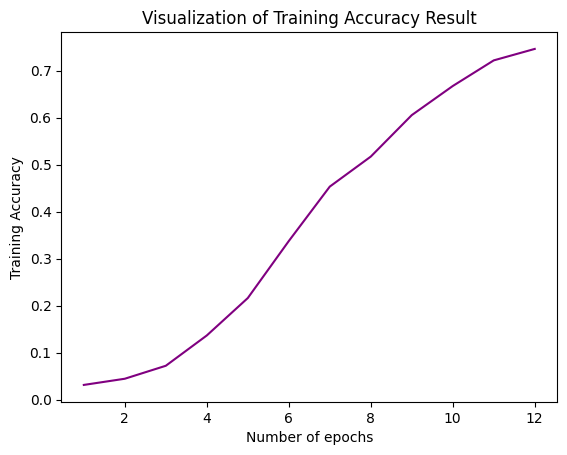

In [ ]:
epochs=[ i for i in range(1,13)]
plt.plot(epochs,training_history.history['accuracy'],color='purple')
plt.xlabel('Number of epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation Accuracy

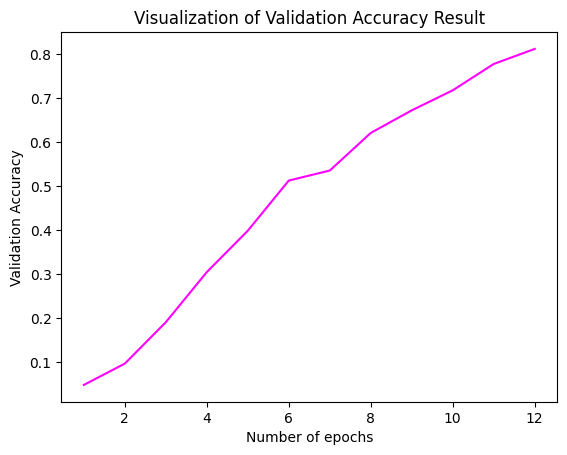

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='Magenta')
plt.xlabel('Number of epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

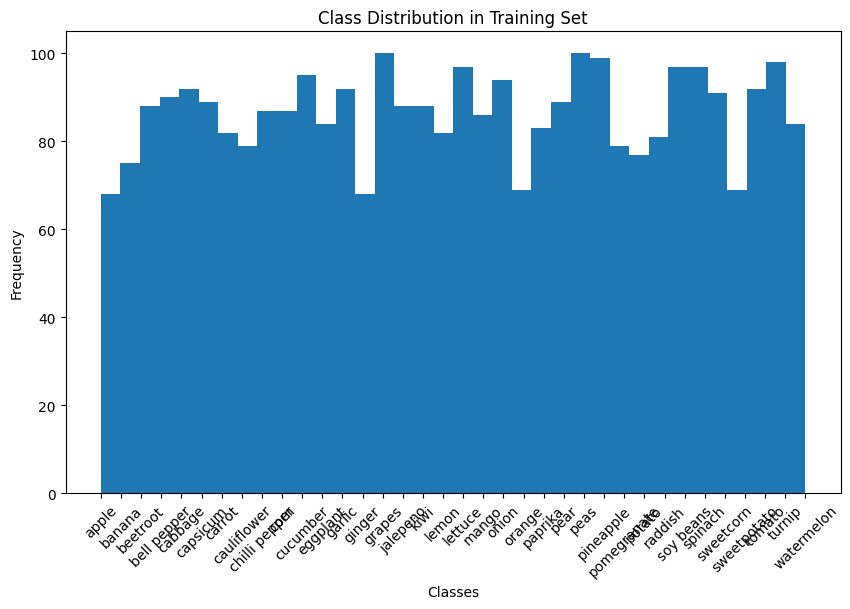

In [ ]:
# Initialize an empty list to store labels
labels = []

# Loop through the training set to collect labels
for images, labels_batch in training_set:
    labels.extend(tf.argmax(labels_batch, axis=1).numpy())

# Plot a histogram of the class distribution in the training set
plt.figure(figsize=(10, 6))
plt.hist(labels, bins=len(class_names))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.title('Class Distribution in Training Set')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

